<a href="https://colab.research.google.com/github/stevengregori92/Learn-SVC/blob/main/using_SVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance

#Import Dataset

In [3]:
train = pd.read_csv('loan_train.csv')
train.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [4]:
train.shape

(614, 12)

#Explore Dataset

In [5]:
len(train), len(train.dropna())

(614, 499)

In [6]:
train.isnull().any()

Gender                 True
Married                True
Dependents             True
Education             False
Self_Employed          True
Applicant_Income      False
Coapplicant_Income    False
Loan_Amount           False
Term                   True
Credit_History         True
Area                  False
Status                False
dtype: bool

In [7]:
train.isnull().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64

In [8]:
train = train.dropna()

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              499 non-null    object 
 1   Married             499 non-null    object 
 2   Dependents          499 non-null    object 
 3   Education           499 non-null    object 
 4   Self_Employed       499 non-null    object 
 5   Applicant_Income    499 non-null    int64  
 6   Coapplicant_Income  499 non-null    float64
 7   Loan_Amount         499 non-null    int64  
 8   Term                499 non-null    float64
 9   Credit_History      499 non-null    float64
 10  Area                499 non-null    object 
 11  Status              499 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 50.7+ KB


#Analyze
Feature Selection

In [10]:
X = train.drop(['Status', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Area'], axis = 1)
y = train['Status']

Model Selection

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .25, random_state = 42)

Analyze Data

In [12]:
norm = MinMaxScaler().fit(X_train)

X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

Standardize Data

In [13]:
stand = StandardScaler().fit(X_train)

X_train_stand = stand.transform(X_train)
X_test_stand = stand.transform(X_test)

Compare Sets

In [14]:
score=[]

trainX = [X_train, X_train_norm, X_train_stand]
testX = [X_test, X_test_norm, X_test_stand]

for X_train_set, X_test_set in zip(trainX, testX):
  svc = SVC()

  svc.fit(X_train_set, y_train)
  y_pred = svc.predict(X_test_set)
  score.append(accuracy_score(y_test, y_pred))

In [15]:
pd.DataFrame({'score':score}, index = ['Organised', 'Normalized', 'Standardized'])


,score
Organised,0.624
Normalized,0.816
Standardized,0.800


Find the most important features (Normalized)

In [16]:
svc = SVC()

svc.fit(X_train_norm, y_train)
perm_importance = permutation_importance(svc, X_test_norm, y_test)
perm_importance.importances_mean

array([-0.0048,  0.    ,  0.    ,  0.    ,  0.2576])

<AxesSubplot:>

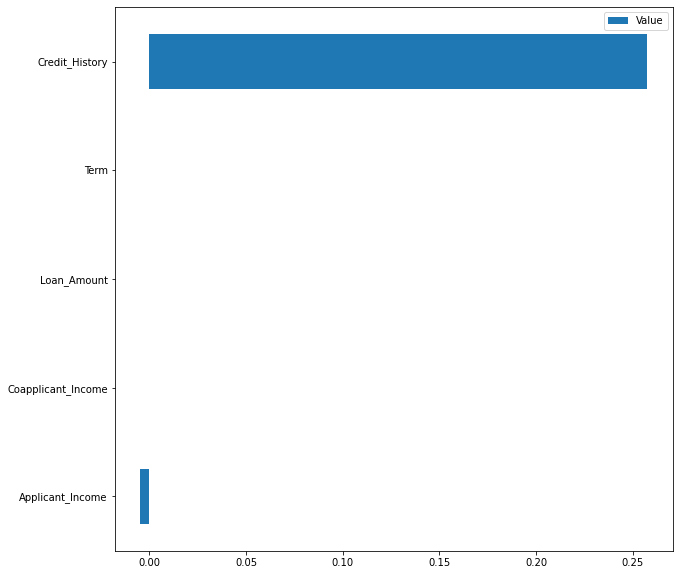

In [17]:
sorted = perm_importance.importances_mean.argsort()

df = pd.DataFrame(perm_importance.importances_mean[sorted], X_test.columns[sorted], columns = ['Value'])
df.plot.barh(figsize = (10,10))

Finding the most important features (standardized)

In [20]:
svc = SVC()

svc.fit(X_train_stand, y_train)
perm_importance = permutation_importance(svc, X_test_stand, y_test)
perm_importance.importances_mean

array([-0.0016, -0.0112, -0.0032,  0.0016,  0.232 ])

<AxesSubplot:>

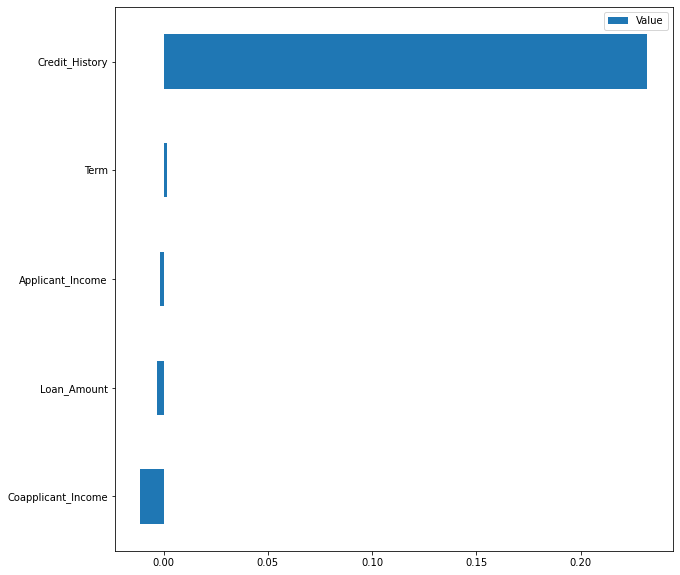

In [21]:
sorted = perm_importance.importances_mean.argsort()

df = pd.DataFrame(perm_importance.importances_mean[sorted], X_test.columns[sorted], columns = ['Value'])
df.plot.barh(figsize = (10,10))

#Report findings

People who had load most likely have credit history.